In [29]:
from pyneuromodulation import nm_BidsStream, nm_analysis
from sklearn import linear_model, metrics, model_selection
import os

In [2]:
PATH_BIDS = os.path.abspath("examples\\data")
PATH_RUN = os.path.abspath("py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr")
PATH_OUT = os.path.abspath(os.path.join('examples', 'data', 'derivatives'))

In [3]:
pn_stream = nm_BidsStream.BidsStream(PATH_RUN=PATH_RUN,
    PATH_BIDS=PATH_BIDS,
    PATH_OUT=PATH_OUT)

Extracting parameters from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame MNI152NLin2009bAsym: None.
Reading electrode coords from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.


c:\Users\ICN_admin\Documents\py_neuromodulation\pyneuromodulation\nm_IO.py:42: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-buttonpress_run-0.

The search_str was "c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\**\sub-testsub_ses-EphysMedOff*events.tsv"
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\pyneuromodulation\nm_IO.py:42: RuntimeWarning: iEEG Coordinate frame MNI152NLin2009bAsym is not a readable BIDS keyword by mne-bids yet. The allowed keywords are: ['ACPC', 'Pixels', 'Other']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\pyneuromodulation\nm_IO.py:42: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\pyneuromodulation\nm_IO.py:42: RuntimeWarning: Fiducial point

The read in electrodes file is: 
 [('name', ['ECOG_L_1_SMC_AT', 'ECOG_L_2_SMC_AT', 'ECOG_L_3_SMC_AT', 'ECOG_L_4_SMC_AT', 'ECOG_L_5_SMC_AT', 'ECOG_L_6_SMC_AT', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_L_1_STN_BS', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_R_234_STN_BS', 'LFP_R_567_STN_BS', 'ANALOG_ROT_R_1']), ('x', ['-47', '-46', '-45.5', '-44.5', '-42', '-39', '11.8', '12.39', '-11.3', '-11.8', '-12.39', '12.93', '13.4', 'n/a']), ('y', ['-26', '-15.5', '-5.5', '4', '14', '22.5', '-15', '-14.29', '-15.9', '-15', '-14.29', '-13.41', '-12.52', 'n/a']), ('z', ['65', '63', '60.5', '57.5', '53.5', '49.5', '-7.7', '-5.9', '-9.9', '-7.7', '-5.9', '-4.1', '-2.2', 'n/a']), ('size', ['n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a'])]


In [4]:
pn_stream.nm_channels

,name,rereference,used,target,type,status,new_name
0,ANALOG_R_ROTA_CH,None,0,0,misc,good,ANALOG_R_ROTA_CH
1,ECOG_L_1_SMC_AT,average,1,0,ecog,good,ECOG_L_1_SMC_AT-avgref
2,ECOG_L_2_SMC_AT,average,1,0,ecog,good,ECOG_L_2_SMC_AT-avgref
3,ECOG_L_3_SMC_AT,average,1,0,ecog,good,ECOG_L_3_SMC_AT-avgref
4,ECOG_L_4_SMC_AT,average,1,0,ecog,good,ECOG_L_4_SMC_AT-avgref
5,ECOG_L_5_SMC_AT,average,1,0,ecog,good,ECOG_L_5_SMC_AT-avgref
6,ECOG_L_6_SMC_AT,average,1,0,ecog,good,ECOG_L_6_SMC_AT-avgref
7,EEG_AO,None,0,0,misc,good,EEG_AO
8,LFP_L_1_STN_BS,LFP_L_567_STN_BS,1,0,seeg,good,LFP_L_1_STN_BS-LFP_L_567_STN_BS
9,LFP_L_234_STN_BS,LFP_L_1_STN_BS,1,0,seeg,good,LFP_L_234_STN_BS-LFP_L_1_STN_BS


In [5]:
pn_stream.settings

{'out_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\rt_example',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': False,
  'feature_normalization': True,
  'kalman_filter': True,
  're_referencing': True,
  'notch_filter': True,
  'bandpass_filter': False,
  'stft': True,
  'fft': False,
  'raw_hjorth': True,
  'sharpwave_analysis': True,
  'return_raw': True,
  'project_cortex': True,
  'project_subcortex': True,
  'coherence': True},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['theta',
   'alpha',
   'low beta',
   'high beta',
   'low gamma',
   'high gamma',
   'HFA']},
 'stft_settings': {'windowle

In [6]:
pn_stream.run_bids()

1.0 seconds of data processed
Last batch took: 0.09 seconds
1.1 seconds of data processed
Last batch took: 0.08 seconds
1.2 seconds of data processed
Last batch took: 0.08 seconds
1.3 seconds of data processed
Last batch took: 0.08 seconds
1.4 seconds of data processed
Last batch took: 0.08 seconds
1.5 seconds of data processed
Last batch took: 0.08 seconds
1.6 seconds of data processed
Last batch took: 0.09 seconds
1.7 seconds of data processed
Last batch took: 0.09 seconds
1.8 seconds of data processed
Last batch took: 0.08 seconds
1.9 seconds of data processed
Last batch took: 0.09 seconds
2.0 seconds of data processed
Last batch took: 0.08 seconds
2.1 seconds of data processed
Last batch took: 0.05 seconds
2.2 seconds of data processed
Last batch took: 0.08 seconds
2.3 seconds of data processed
Last batch took: 0.05 seconds
2.4 seconds of data processed
Last batch took: 0.05 seconds
2.5 seconds of data processed
Last batch took: 0.05 seconds
2.6 seconds of data processed
Last batch

In [7]:
pn_stream.feature_arr

,ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,ECOG_L_1_SMC_AT-avgref_raw,ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_prominence,ECOG_L_1_SMC_AT-avgref_Sharpwave_Mean_interval,ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_sharpness,ECOG_L_1_SMC_AT-avgref_stft_theta,ECOG_L_1_SMC_AT-avgref_stft_alpha,ECOG_L_1_SMC_AT-avgref_stft_low beta,...,gridsubcortex_879_stft_high gamma,gridsubcortex_891_stft_high gamma,gridsubcortex_1082_stft_high gamma,gridsubcortex_866_stft_HFA,gridsubcortex_878_stft_HFA,gridsubcortex_879_stft_HFA,gridsubcortex_891_stft_HFA,gridsubcortex_1082_stft_HFA,time,SQUARED_ROTATION
0,554.538409,0.119505,10.325938,-16.160959,22.878252,18.666667,-0.211145,0.587672,0.570134,0.339303,...,-0.603013,-0.658220,-0.479227,-0.578820,-0.609252,-0.712899,-0.775162,-0.571381,1000.0,0.0
1,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1100.0,0.0
2,-1.331624,1.408613,-1.383964,-0.548407,-0.550227,-0.911468,0.772829,1.063939,1.088963,1.105294,...,-0.790220,-0.850022,-0.629951,-0.676644,-0.694405,-0.773465,-0.825686,-0.663451,1200.0,0.0
3,-1.425783,0.699040,1.214056,0.740696,-1.052615,-1.133796,-0.733271,1.062429,1.053075,1.092138,...,0.110410,-0.073264,0.570307,0.329155,0.270742,0.055025,-0.078832,0.351429,1300.0,0.0
4,-1.209124,0.744959,0.772673,0.243203,-0.171484,-0.644396,-1.346357,1.034598,0.997676,1.120986,...,1.190057,1.051466,1.541100,1.401936,1.348924,1.168439,1.060034,1.414864,1400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.675103,-0.484583,-0.479560,-1.325230,-0.446707,1.059849,0.969555,0.221480,0.382128,1.792072,...,-0.355987,-0.369216,-0.362041,-0.217835,-0.232491,-0.256181,-0.263734,-0.226753,17500.0,0.0
166,1.178222,-0.794486,-0.189494,2.552827,2.182012,-0.341297,-0.049799,0.376658,0.662150,2.015305,...,-0.365229,-0.372158,-0.381602,-0.240813,-0.244499,-0.248413,-0.248564,-0.244031,17600.0,0.0
167,1.093560,-0.816235,0.041568,-0.350382,0.295996,1.724292,-1.689414,0.618562,0.752128,2.106416,...,-0.370672,-0.371370,-0.400735,-0.263465,-0.258762,-0.244981,-0.237272,-0.263548,17700.0,0.0
168,2.036158,-1.253024,0.491240,1.234930,1.378635,-2.332607,-0.975899,0.998476,0.957535,2.211389,...,-0.390202,-0.393045,-0.414611,-0.290690,-0.273726,-0.245076,-0.235280,-0.280955,17800.0,0.0


In [8]:
pn_stream.feature_arr.describe()

,ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,ECOG_L_1_SMC_AT-avgref_raw,ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_prominence,ECOG_L_1_SMC_AT-avgref_Sharpwave_Mean_interval,ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_sharpness,ECOG_L_1_SMC_AT-avgref_stft_theta,ECOG_L_1_SMC_AT-avgref_stft_alpha,ECOG_L_1_SMC_AT-avgref_stft_low beta,...,gridsubcortex_879_stft_high gamma,gridsubcortex_891_stft_high gamma,gridsubcortex_1082_stft_high gamma,gridsubcortex_866_stft_HFA,gridsubcortex_878_stft_HFA,gridsubcortex_879_stft_HFA,gridsubcortex_891_stft_HFA,gridsubcortex_1082_stft_HFA,time,SQUARED_ROTATION
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,3.055730,0.284230,-0.263237,0.247217,0.136331,0.032910,-0.132394,0.201188,0.202626,-0.042430,...,-0.487245,-0.498975,-0.459082,-0.491573,-0.492645,-0.494272,-0.494735,-0.492275,9450.000000,0.111765
std,42.558082,1.023205,1.219153,1.645048,2.020249,1.746226,1.039091,1.120215,1.038550,1.211357,...,0.608368,0.603386,0.624619,0.606049,0.604172,0.602330,0.602735,0.605337,4921.889881,0.316008
min,-2.020715,-1.699468,-2.407077,-16.160959,-1.737520,-2.487729,-3.000000,-1.736655,-1.912595,-1.989533,...,-2.312104,-2.332672,-2.271966,-2.304881,-2.310786,-2.340433,-2.359261,-2.307795,1000.000000,0.000000
25%,-0.959152,-0.492496,-0.880339,-0.376895,-0.783845,-0.635820,-0.817773,-0.796369,-0.594577,-0.966643,...,-0.527167,-0.530941,-0.489185,-0.518284,-0.505907,-0.510661,-0.523971,-0.501441,5225.000000,0.000000
50%,-0.509268,0.301069,-0.411693,0.440352,-0.193939,-0.070213,0.044574,0.283712,0.216442,-0.157206,...,-0.367430,-0.371764,-0.355166,-0.423115,-0.407081,-0.393736,-0.389528,-0.409598,9450.000000,0.000000
75%,0.534492,0.911826,0.226891,0.997088,0.659002,0.568110,0.657161,1.081035,0.978181,1.028919,...,-0.317266,-0.314198,-0.310044,-0.307643,-0.300291,-0.308054,-0.310061,-0.309647,13675.000000,0.000000
max,554.538409,3.000000,10.325938,2.816133,22.878252,18.666667,2.155358,2.269315,2.090437,2.490634,...,1.780027,1.778179,1.783380,1.785549,1.784881,1.777528,1.771818,1.788132,17900.000000,1.000000


In [16]:
file_name = os.path.basename(PATH_RUN)
file_name

'sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr'

In [17]:
feature_reader = nm_analysis.Feature_Reader(
        feature_dir=PATH_OUT,
        feature_file=file_name
)

In [23]:
ch = "ECOG_L_1_SMC_AT-avgref"
list_feature_keywords = ["stft"]

Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\MOV_aligned_features_ch_ECOG_L_1_SMC_AT-avgref_stft.png


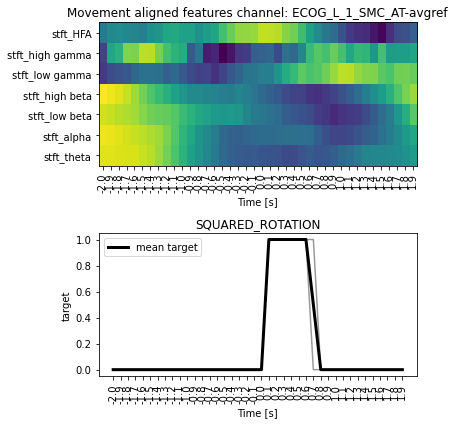

In [24]:
feature_reader.plot_target_averaged_channel(
        ch=ch,
        list_feature_keywords=list_feature_keywords,
        epoch_len=4,
        threshold=0.5
    )

In [26]:
 model = linear_model.LogisticRegression(class_weight='balanced')

In [30]:
feature_reader.set_decoder(
        model = model,
        eval_method=metrics.balanced_accuracy_score,
        cv_method=model_selection.KFold(n_splits=3, shuffle=True),
        get_movement_detection_rate=True,
        min_consequent_count=2
    )

In [35]:
performances = feature_reader.run_ML_model(
        estimate_channels=True,
        estimate_gridpoints=True,
        estimate_all_channels_combined=False,
        save_results=True
    )

no movements in label
no movements in label
no movements in label
no movements in label
model being saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_LM_ML_RES.p


Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\PLOT_CORTEX_ch_performance_allch_allgrid.png


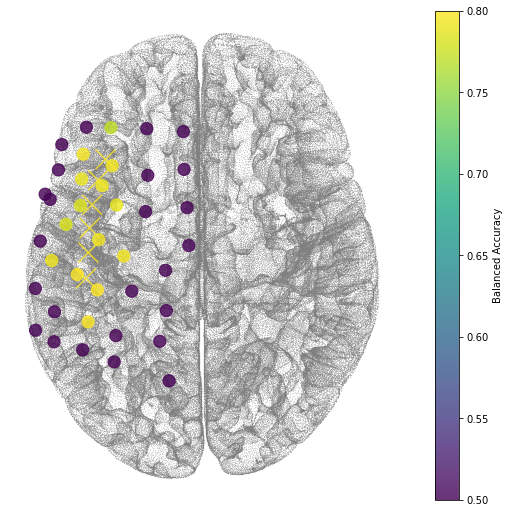

In [36]:
feature_reader.plot_subject_grid_ch_performance(performance_dict=performances, plt_grid=True)
